# **Basic approaches: Mean and Naive methods**

# Naive Method
In the Naive Method the previous observation is used to forecast the next one. It is therefore a very simple model that is purely used to compare the forecasts of more-advanced methods.

In [1]:
# Import the necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the dataset for the naive method
data = pd.read_csv("../Data/weekly_data_copy.csv")
data = data.dropna()
data

FileNotFoundError: [Errno 2] No such file or directory: '../Data/weekly_data_copy.csv'

In [ ]:
# convert DateTime column into datetime format
data["datetime"] = pd.to_datetime(data['datetime'])
# set DateTime as index
data.set_index("datetime", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2013-06-16 00:00:00+00:00 to 2019-12-01 00:00:00+00:00
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   330 non-null    float64
 1   suction_tension (40cm)   330 non-null    float64
 2   suction_tension (70cm)   330 non-null    float64
 3   water_temperature        330 non-null    float64
 4   barometric_pressure_qfe  330 non-null    float64
 5   dew_point                330 non-null    float64
 6   water_level              330 non-null    float64
 7   inflow_linth (m3/s)      330 non-null    float64
 8   outflow_limmat (m3/s)    330 non-null    float64
 9   precipitation (mm)       330 non-null    float64
 10  Evapotranspiration (mm)  330 non-null    float64
 11  change_rate              330 non-null    float64
dtypes: float64(12)
memory usage: 33.5 KB


In [ ]:
dnaive = data.copy()
train_len = 237
dnaive_train = dnaive[0:train_len] # first 237 weeks are used for the train
dnaive_val = dnaive[train_len:284] # set for validation until end of 2018

In [ ]:
validation_dnaive_test = dnaive_val.copy()
validation_dnaive_test['naive'] = dnaive_train['water_level'][train_len-1] # Validation part is calculated

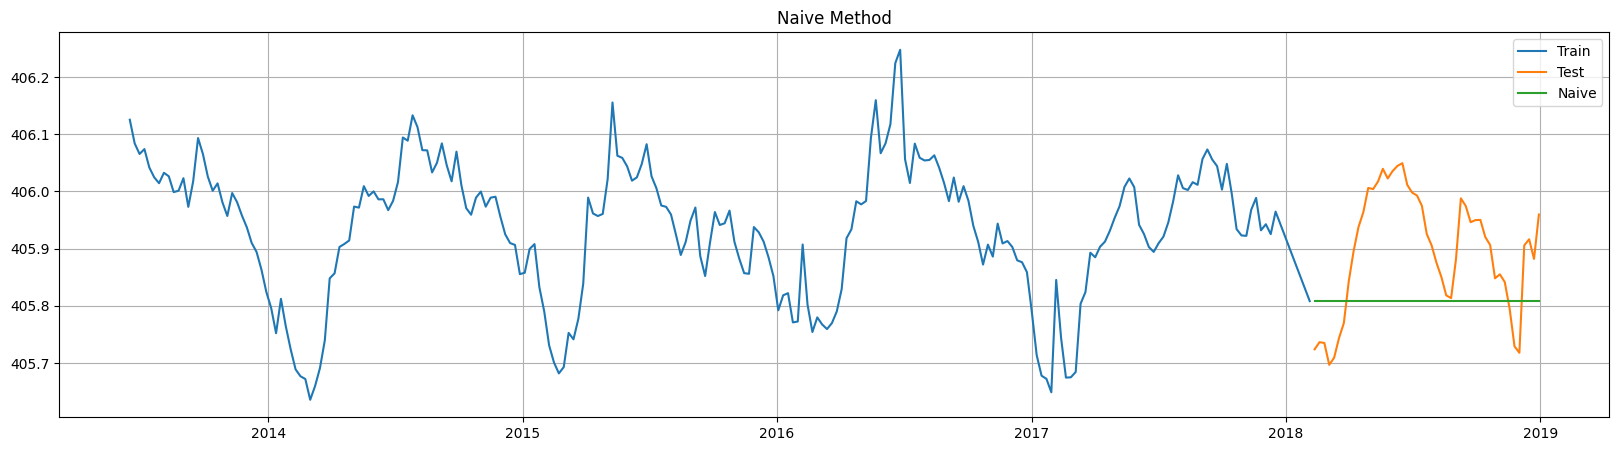

In [ ]:
#Plot the train, the validation and the naive sets
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dnaive_train['water_level'], label='Train')
plt.plot(dnaive_val['water_level'], label='Test')
plt.plot(validation_dnaive_test['naive'], label='Naive')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
#Compute the errors 
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
from sklearn.metrics import r2_score

def mean_errors(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    MAE = mae(actual, pred)
    MSE = np.square(np.subtract(actual,pred)).mean()
    MAPE = np.mean(np.abs((actual - pred) / actual)) * 100
    R2_score = r2_score(actual, pred)
    return print("MAE: {} \nMSE: {} \nMAPE: {} \nR2: {}".format(MAE, MSE, MAPE, R2_score))

In [ ]:
mean_errors(validation_dnaive_test['naive'], dnaive_test['water_level'])

MAE: 0.11861531261162171 
MSE: 0.01845858654021915 
MAPE: 0.029229404441547154 
R2: -5.712655836687871e+24


**Now let's do the same but for 2019 onwards.**

In [ ]:
dnaive_forecast = data.copy()
train_len = 284
dnaive_train = dnaive[0:train_len] # first 284 weeks are used 
dnaive_future = dnaive[train_len:] # Until the end of the dataset with the unseen data

In [ ]:
future_dnaive = dnaive_future.copy()
future_dnaive['naive'] = dnaive_train['water_level'][train_len-1] # Prediction of the future values

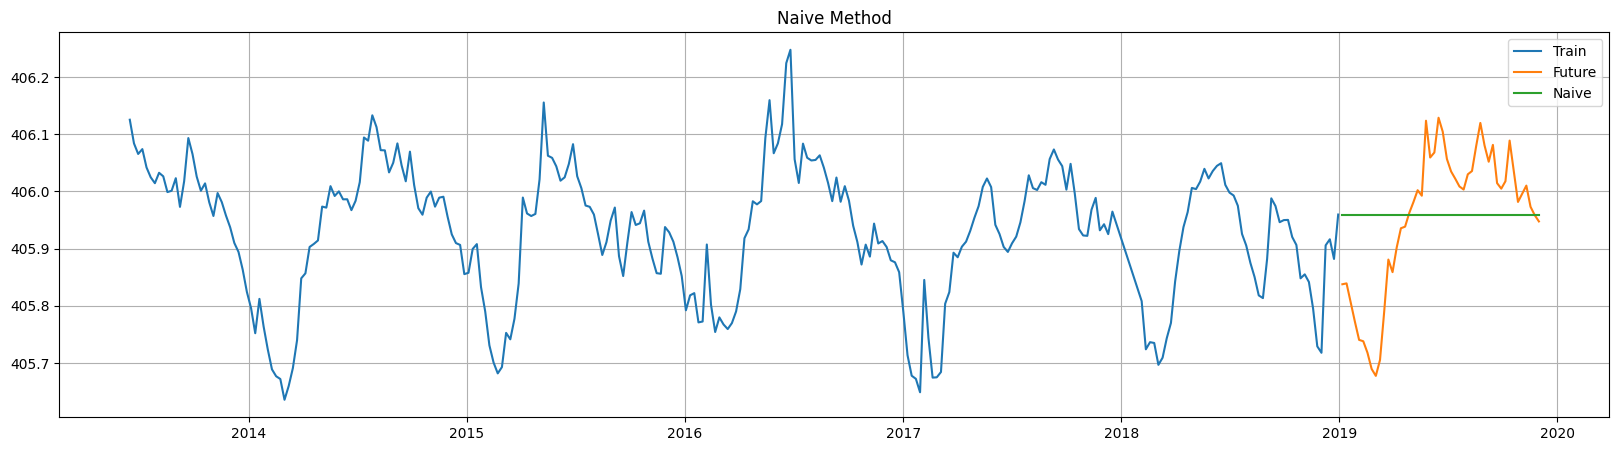

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dnaive_train['water_level'], label='Train')
plt.plot(dnaive_future['water_level'], label='Future')
plt.plot(future_dnaive['naive'], label='Naive')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
mean_errors(dnaive_future['water_level'], future_dnaive['naive'])

MAE: 0.10240737602818538 
MSE: 0.01598556947825953 
MAPE: 0.025229161237073378 
R2: -0.00010400770405238902


#  Mean method
This is another basic approach, where the average of the previous data is used as a forecast.

In [ ]:
dmean = data.copy()

In [ ]:
train_len = 237
dmean_train = dmean[0:train_len] 
dmean_test = dmean[train_len:284]

In [ ]:
validation_dmean_test = dmean_test.copy()
validation_dmean_test['mean'] = dmean_train["water_level"].mean() # The mean of the historical data is taken into consideration.

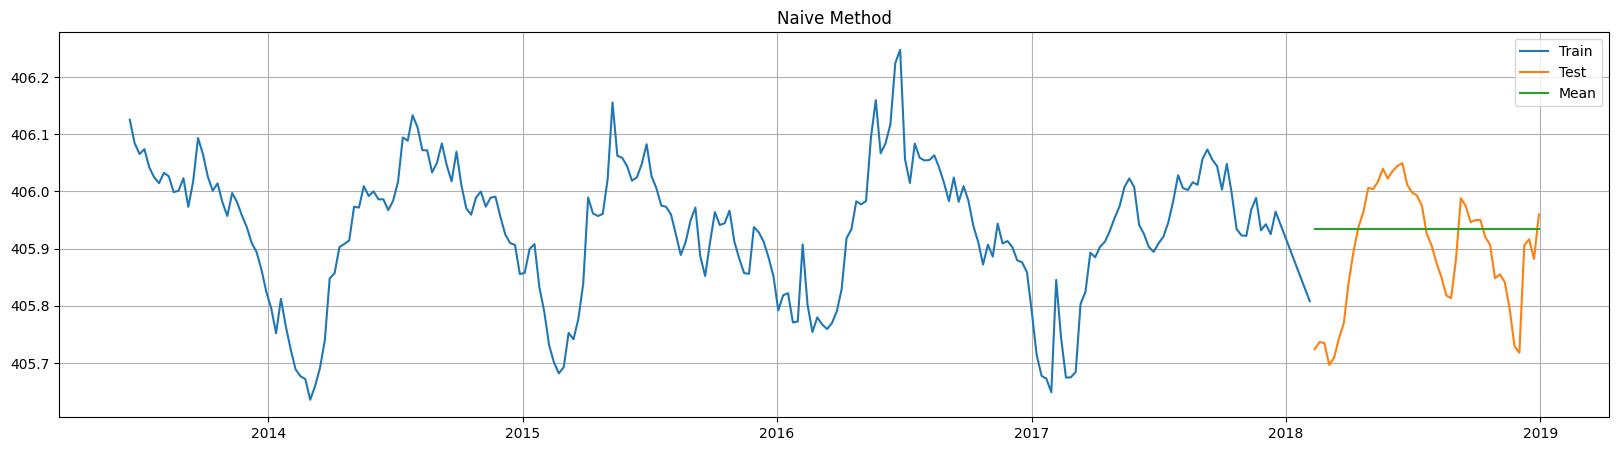

In [ ]:
#Plot the validation, the test and the mean.
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dmean_train['water_level'], label='Train')
plt.plot(dmean_test['water_level'], label='Test')
plt.plot(validation_dmean_test['mean'], label='Mean')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
mean_errors(dmean_test['water_level'], validation_dmean_test['mean']) # Caluclate errors.

MAE: 0.08863543254970656 
MSE: 0.012216454286020504 
MAPE: 0.021839924079268987 
R2: -0.13544947690159992


**Now let's do the same but for 2019 onwards.**

In [ ]:
train_len = 284
dmean_train = dmean[0:train_len] 
dmean_test = dmean[train_len:]

In [ ]:
validation_dmean_future = dmean_test.copy()
validation_dmean_future['mean'] = dmean_train["water_level"].mean()

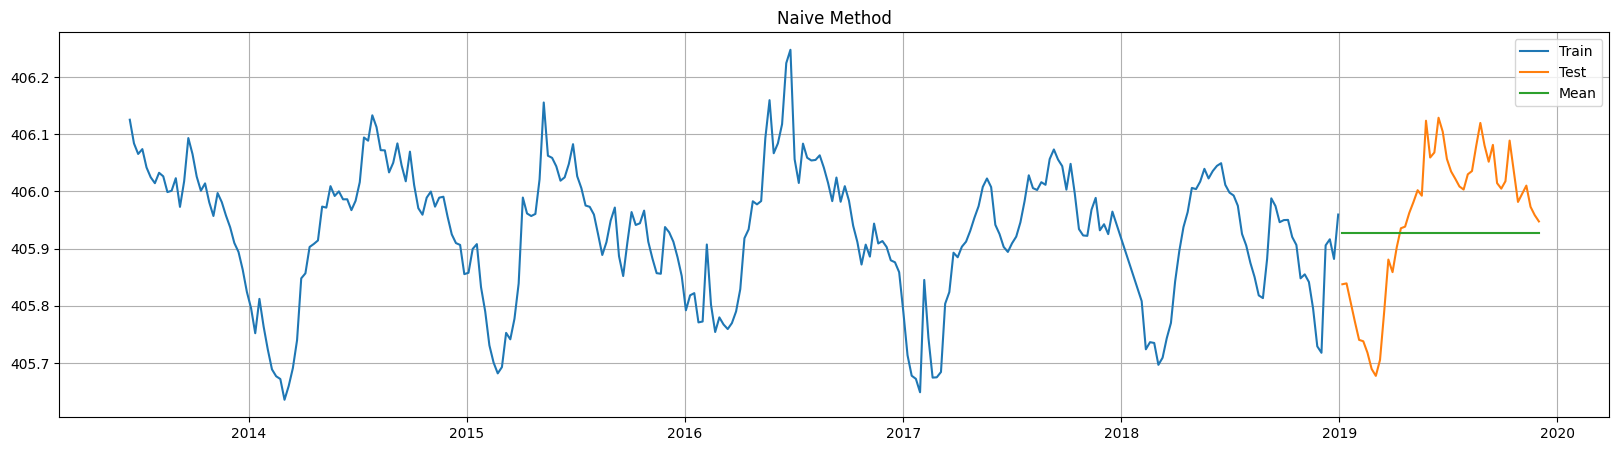

In [ ]:
#Plot the validation, the test and the future.
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dmean_train['water_level'], label='Train')
plt.plot(dmean_test['water_level'], label='Test')
plt.plot(validation_dmean_future['mean'], label='Mean')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
mean_errors(dmean_test['water_level'], validation_dmean_future['mean']) #Calculate the errors.

MAE: 0.11373309955455299 
MSE: 0.01691996320785375 
MAPE: 0.02801706210457316 
R2: -0.05856241389418715
